In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
df = pd.read_csv('../data/raw/phone_usage_india.csv')

In [42]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()

missing_values_count, total_missing_values

(User ID                         0
 Age                             0
 Gender                          0
 Location                        0
 Phone Brand                     0
 OS                              0
 Screen Time (hrs/day)           0
 Data Usage (GB/month)           0
 Calls Duration (mins/day)       0
 Number of Apps Installed        0
 Social Media Time (hrs/day)     0
 E-commerce Spend (INR/month)    0
 Streaming Time (hrs/day)        0
 Gaming Time (hrs/day)           0
 Monthly Recharge Cost (INR)     0
 Primary Use                     0
 dtype: int64,
 np.int64(0))

In [7]:
print(df['Phone Brand'].unique())

['Vivo' 'Realme' 'Nokia' 'Samsung' 'Xiaomi' 'Oppo' 'Apple' 'Google Pixel'
 'Motorola' 'OnePlus']


In [3]:
len(df)

17686

In [4]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [8]:
print(df['Location'].unique())

['Mumbai' 'Delhi' 'Ahmedabad' 'Pune' 'Jaipur' 'Lucknow' 'Kolkata'
 'Bangalore' 'Chennai' 'Hyderabad']


In [9]:
print(df['Gender'].unique())

['Male' 'Other' 'Female']


In [10]:
print(df['OS'].unique())

['Android' 'iOS']


In [3]:
unique_combinations_count = df.groupby(['Phone Brand', 'OS']).size().reset_index(name='Count')
print(unique_combinations_count)


     Phone Brand       OS  Count
0          Apple  Android    879
1          Apple      iOS    896
2   Google Pixel  Android    830
3   Google Pixel      iOS    899
4       Motorola  Android    860
5       Motorola      iOS    857
6          Nokia  Android    904
7          Nokia      iOS    912
8        OnePlus  Android    950
9        OnePlus      iOS    857
10          Oppo  Android    872
11          Oppo      iOS    844
12        Realme  Android    855
13        Realme      iOS    907
14       Samsung  Android    888
15       Samsung      iOS    876
16          Vivo  Android    903
17          Vivo      iOS    894
18        Xiaomi  Android    910
19        Xiaomi      iOS    893


In [5]:
unique_combinations_count = df.groupby(['Phone Brand', 'Gaming Time (hrs/day)', 'OS']).size().reset_index(name='Count')
print(unique_combinations_count)


     Phone Brand  Gaming Time (hrs/day)       OS  Count
0          Apple                    0.0  Android     13
1          Apple                    0.0      iOS     13
2          Apple                    0.1  Android     22
3          Apple                    0.1      iOS     22
4          Apple                    0.2  Android     26
...          ...                    ...      ...    ...
1015      Xiaomi                    4.8      iOS     17
1016      Xiaomi                    4.9  Android     20
1017      Xiaomi                    4.9      iOS     22
1018      Xiaomi                    5.0  Android      4
1019      Xiaomi                    5.0      iOS     18

[1020 rows x 4 columns]


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/cleaned/cleaned_standardized_phone_usage.csv')

# Define bins and labels for gaming time categories
bins = [-1, 1, 2, 3, 4, 5, float('inf')]
labels = ["<1 hr", "1-2 hrs", "2-3 hrs", "3-4 hrs", "4-5 hrs", "Above 5 hrs"]

# Create a new column for gaming time category
df['Gaming Time Category'] = pd.cut(df['Gaming Time (hrs/day)'], bins=bins, labels=labels)

# Count unique combinations
unique_combinations_count = df.groupby(['Phone Brand', 'OS', 'Gaming Time Category']).size().reset_index(name='Count')

# Display result
print(unique_combinations_count)

# Save results to CSV
unique_combinations_count.to_csv('../data/cleaned/gaming_time_distribution.csv', index=False)


    Phone Brand       OS Gaming Time Category  Count
0         Apple  Android                <1 hr    283
1         Apple  Android              1-2 hrs    273
2         Apple  Android              2-3 hrs    237
3         Apple  Android              3-4 hrs    263
4         Apple  Android              4-5 hrs    262
..          ...      ...                  ...    ...
115      Xiaomi      iOS              1-2 hrs    121
116      Xiaomi      iOS              2-3 hrs    133
117      Xiaomi      iOS              3-4 hrs    132
118      Xiaomi      iOS              4-5 hrs    147
119      Xiaomi      iOS          Above 5 hrs      0

[120 rows x 4 columns]


/var/folders/55/d2zlvtlx1j9c8nn0wq6124n00000gn/T/ipykernel_1180/4274422848.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_combinations_count = df.groupby(['Phone Brand', 'OS', 'Gaming Time Category']).size().reset_index(name='Count')


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/cleaned/cleaned_standardized_phone_usage.csv')

# Define bins and labels for gaming time categories
gaming_bins = [-1, 1, 2, 3, 4, 5, float('inf')]
gaming_labels = ["<1 hr", "1-2 hrs", "2-3 hrs", "3-4 hrs", "4-5 hrs", "Above 5 hrs"]

# Define bins and labels for screen time categories
screen_bins = [-1, 2, 4, 6, 8, 10, float('inf')]
screen_labels = ["<2 hrs", "2-4 hrs", "4-6 hrs", "6-8 hrs", "8-10 hrs", "Above 10 hrs"]

# Create new columns for gaming and screen time categories
df['Gaming Time Category'] = pd.cut(df['Gaming Time (hrs/day)'], bins=gaming_bins, labels=gaming_labels)
df['Screen Time Category'] = pd.cut(df['Screen Time (hrs/day)'], bins=screen_bins, labels=screen_labels)

# Count unique combinations
unique_combinations_count = df.groupby(['Phone Brand', 'OS', 'Gaming Time Category', 'Screen Time Category']).size().reset_index(name='Count')

# Display result
print(unique_combinations_count)

# Save results to CSV
unique_combinations_count.to_csv('../data/cleaned/gaming_screen_time_distribution.csv', index=False)


    Phone Brand       OS Gaming Time Category Screen Time Category  Count
0         Apple  Android                <1 hr               <2 hrs     25
1         Apple  Android                <1 hr              2-4 hrs     43
2         Apple  Android                <1 hr              4-6 hrs     53
3         Apple  Android                <1 hr              6-8 hrs     58
4         Apple  Android                <1 hr             8-10 hrs     55
..          ...      ...                  ...                  ...    ...
715      Xiaomi      iOS          Above 5 hrs              2-4 hrs      0
716      Xiaomi      iOS          Above 5 hrs              4-6 hrs      0
717      Xiaomi      iOS          Above 5 hrs              6-8 hrs      0
718      Xiaomi      iOS          Above 5 hrs             8-10 hrs      0
719      Xiaomi      iOS          Above 5 hrs         Above 10 hrs      0

[720 rows x 5 columns]


/var/folders/55/d2zlvtlx1j9c8nn0wq6124n00000gn/T/ipykernel_1180/1433183208.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_combinations_count = df.groupby(['Phone Brand', 'OS', 'Gaming Time Category', 'Screen Time Category']).size().reset_index(name='Count')


In [6]:
apple_combinations = unique_combinations_count[unique_combinations_count['Phone Brand'] == 'Apple']
print(apple_combinations)


    Phone Brand  Gaming Time (hrs/day)       OS  Count
0         Apple                    0.0  Android     13
1         Apple                    0.0      iOS     13
2         Apple                    0.1  Android     22
3         Apple                    0.1      iOS     22
4         Apple                    0.2  Android     26
..          ...                    ...      ...    ...
97        Apple                    4.8      iOS     18
98        Apple                    4.9  Android     13
99        Apple                    4.9      iOS     22
100       Apple                    5.0  Android      9
101       Apple                    5.0      iOS     10

[102 rows x 4 columns]


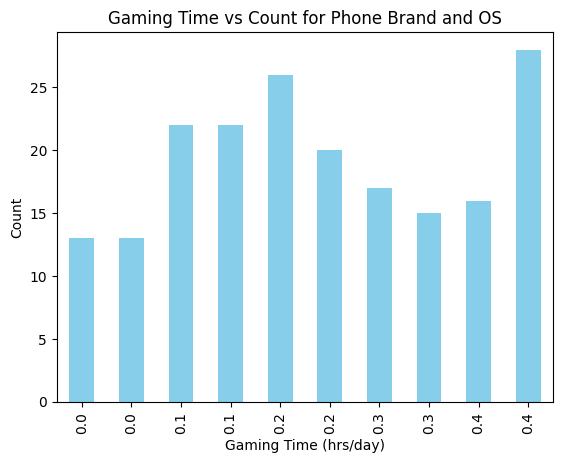

In [7]:
import matplotlib.pyplot as plt

# Plotting the first few combinations as an example
unique_combinations_count.head(10).plot(kind='bar', x='Gaming Time (hrs/day)', y='Count', color='skyblue', legend=False)
plt.title('Gaming Time vs Count for Phone Brand and OS')
plt.xlabel('Gaming Time (hrs/day)')
plt.ylabel('Count')
plt.show()


In [11]:
print(df['Primary Use'].unique())

['Education' 'Gaming' 'Entertainment' 'Social Media' 'Work']


In [6]:
unique_combinations = df[['Phone Brand', 'OS']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS
        Vivo Android
      Realme     iOS
       Nokia Android
     Samsung Android
      Xiaomi     iOS
        Oppo     iOS
       Apple     iOS
        Oppo Android
      Realme Android
     Samsung     iOS
Google Pixel Android
       Apple Android
    Motorola     iOS
      Xiaomi Android
        Vivo     iOS
    Motorola Android
     OnePlus Android
Google Pixel     iOS
       Nokia     iOS
     OnePlus     iOS


In [6]:
unique_combinations = df[['Phone Brand', 'OS']].drop_duplicates()
wrong_combinations = df[~df[['Phone Brand', 'OS']].apply(tuple, axis=1).isin(unique_combinations.apply(tuple, axis=1))]

# Count of wrong combinations
wrong_combinations_count = len(wrong_combinations)

print(f"Total Wrong Combinations: {wrong_combinations_count}")


Total Wrong Combinations: 0


In [8]:
unique_combinations = df[['Phone Brand', 'OS']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS
        Vivo Android
      Realme     iOS
       Nokia Android
     Samsung Android
      Xiaomi     iOS
        Oppo     iOS
       Apple     iOS
        Oppo Android
      Realme Android
     Samsung     iOS
Google Pixel Android
       Apple Android
    Motorola     iOS
      Xiaomi Android
        Vivo     iOS
    Motorola Android
     OnePlus Android
Google Pixel     iOS
       Nokia     iOS
     OnePlus     iOS


In [20]:
# Define correct combinations
correct_combinations = {
    "Apple": ["iOS"],
    "Google Pixel": ["Android"],
    "OnePlus": ["Android"],
    "Samsung": ["Android"],  # Samsung's core OS
    "Motorola": ["Android"],
    "Xiaomi": ["Android"],
    "Vivo": ["Android"],
    "Realme": ["Android"],
    "Oppo": ["Android"],
    "Nokia": ["Android"]
}

# Identify wrong rows
wrong_combinations = df[~df.apply(lambda row: row['OS'] in correct_combinations.get(row['Phone Brand'], []), axis=1)]

# Count wrong combinations
print(f"Total Wrong Combinations: {len(wrong_combinations)}")


Total Wrong Combinations: 8818


In [23]:
# Load dataset
df_cleaned = pd.read_csv('../data/cleaned/cleaned_phone_usage_india.csv')

In [24]:
unique_combinations = df_cleaned[['Phone Brand', 'OS']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS
        Vivo Android
     Samsung Android
       Nokia Android
Google Pixel Android
       Apple     Ios
        Oppo Android
      Realme Android
      Xiaomi Android
     Oneplus Android
    Motorola Android


In [14]:
unique_combinations = df_cleaned[['Phone Brand', 'OS','Number of Apps Installed','Screen Time (hrs/day)','Gaming Time (hrs/day)','Data Usage (GB/month)']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS  Number of Apps Installed  Screen Time (hrs/day)  Gaming Time (hrs/day)  Data Usage (GB/month)
        Vivo Android                       104                    3.7                    4.1                   23.9
      Realme     iOS                       169                    9.2                    0.4                   28.1
       Nokia Android                        96                    4.5                    2.9                   12.3
     OnePlus Android                       146                   11.0                    0.3                   25.6
      Xiaomi     iOS                        86                    2.2                    2.3                    2.5
        Oppo     iOS                        25                    5.4                    4.8                   10.6
       Apple     iOS                       123                    6.0                    2.3                   35.2
      Realme     iOS                       188                    3.1   

In [16]:
df_cleaned.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Battery Consumption (mAh/day)
0,53.0,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,222.0
1,60.0,Other,Delhi,Realme,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,506.0
2,37.0,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,225.0
3,32.0,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,770.0
4,16.0,Male,Mumbai,Xiaomi,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,143.0


In [17]:
# Summary statistics for numerical columns
df_cleaned.describe()


,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Battery Consumption (mAh/day)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367,428.319009
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067,221.935794
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000,50.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000,242.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000,420.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000,590.000000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000,1020.000000


In [43]:
# Count the occurrences of each primary use
df_cleaned['Primary Use'].value_counts()


Primary Use
Education        3601
Gaming           3576
Work             3557
Social Media     3501
Entertainment    3451
Name: count, dtype: int64

In [45]:
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['below 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'Age_Bracket' based on the age bins
df_cleaned['Age_Bracket'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Get value counts for the age brackets
age_bracket_counts = df_cleaned['Age_Bracket'].value_counts()

print(age_bracket_counts)


Age_Bracket
50-60       3962
40-50       3818
20-30       3815
30-40       3791
10-20       1941
60-70        359
below 10       0
70-80          0
80-90          0
90-100         0
Name: count, dtype: int64


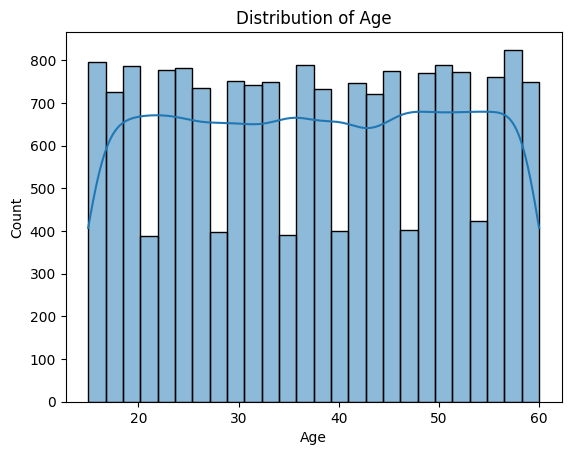

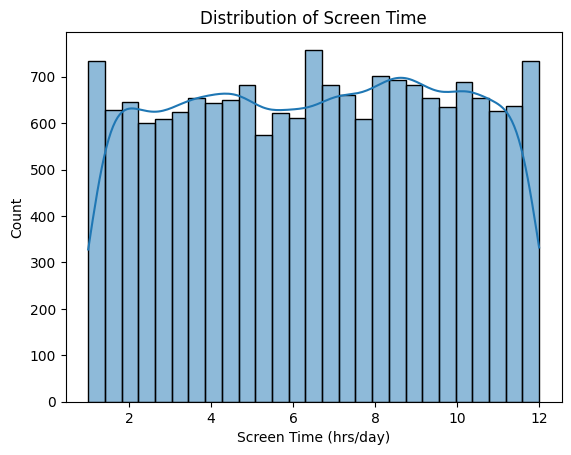

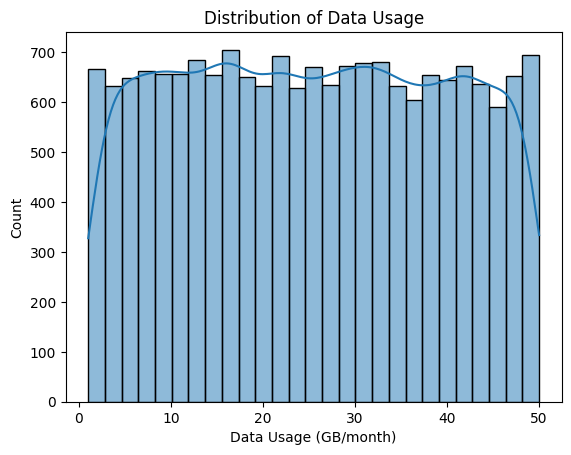

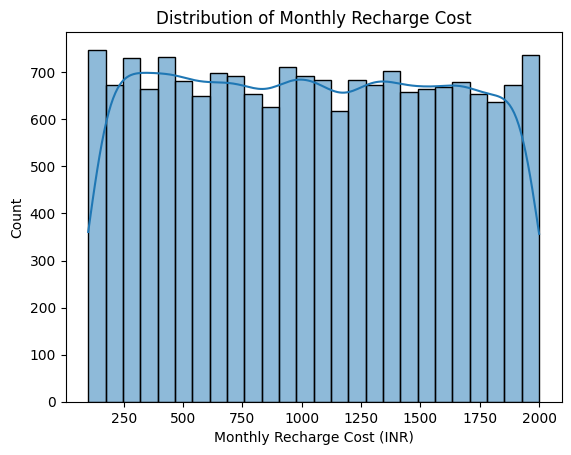

In [25]:
# Visualize the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df_cleaned['Screen Time (hrs/day)'], kde=True)
plt.title('Distribution of Screen Time')
plt.show()

sns.histplot(df_cleaned['Data Usage (GB/month)'], kde=True)
plt.title('Distribution of Data Usage')
plt.show()

sns.histplot(df_cleaned['Monthly Recharge Cost (INR)'], kde=True)
plt.title('Distribution of Monthly Recharge Cost')
plt.show()


In [26]:
# Load dataset
df_processed = pd.read_csv('../data/processed/feature_engineered_data.csv')

In [27]:
df_processed.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Battery Consumption (mAh/day)
0,1.155788,1,0,0,0,0.456467,0.778626,0.477412,0.776505,0.768460,0.334604,0.792006,0.909296,0.694669,0,0.492322
1,1.680609,2,1,1,1,0.870413,0.826754,0.228865,0.942347,0.603420,0.849054,0.782931,0.187789,0.909472,1,0.766402
2,-0.043804,0,2,2,0,0.540442,0.584997,0.619307,0.749229,0.636718,0.687781,0.328050,0.759575,0.929270,2,0.496781
3,-0.418676,1,3,9,0,0.957238,0.799019,0.834091,0.892314,0.921217,0.536028,0.574642,0.146428,0.916846,2,0.929275
4,-1.618267,1,0,4,1,0.251097,0.172791,0.939161,0.711780,0.951892,0.012558,0.600605,0.666341,0.668248,3,0.346375


In [37]:
# Count the occurrences of each primary use
df_processed['Primary Use'].value_counts()


Primary Use
0    3601
1    3576
4    3557
3    3501
2    3451
Name: count, dtype: int64

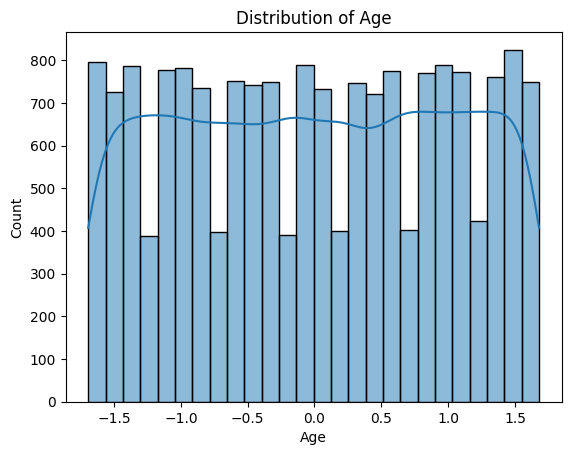

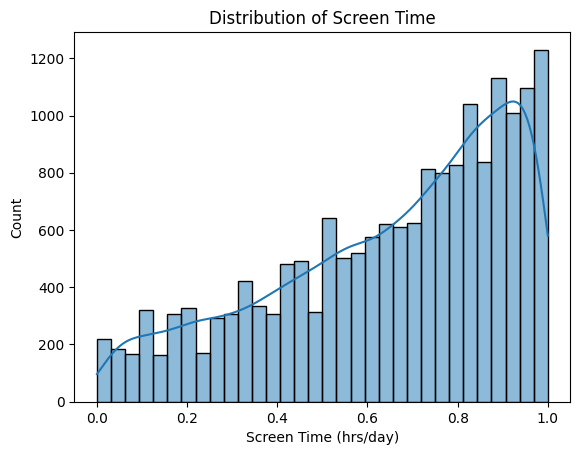

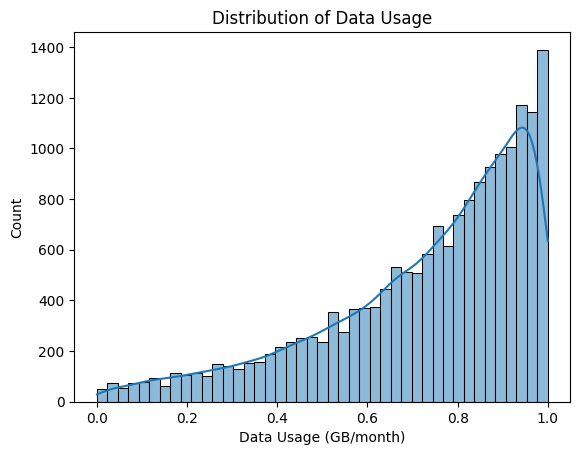

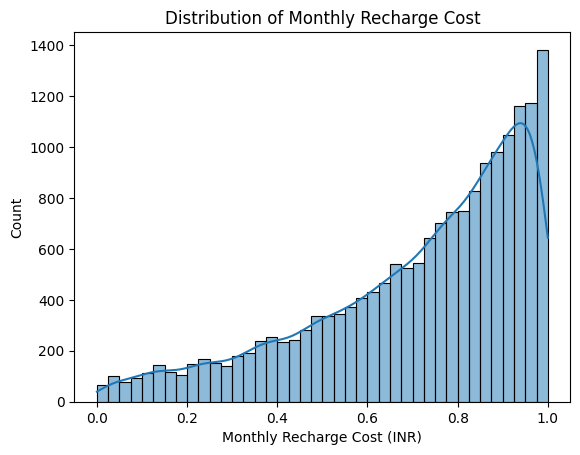

In [28]:
# Visualize the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_processed['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df_processed['Screen Time (hrs/day)'], kde=True)
plt.title('Distribution of Screen Time')
plt.show()

sns.histplot(df_processed['Data Usage (GB/month)'], kde=True)
plt.title('Distribution of Data Usage')
plt.show()

sns.histplot(df_processed['Monthly Recharge Cost (INR)'], kde=True)
plt.title('Distribution of Monthly Recharge Cost')
plt.show()


In [30]:
df_cleaned['Primary Use'].value_counts()


Primary Use
Education        3601
Gaming           3576
Work             3557
Social Media     3501
Entertainment    3451
Name: count, dtype: int64

In [31]:
primary_use_mapping = {'Education': 0, 'Gaming': 1, 'Entertainment': 2, 'Social Media': 3, 'Work': 4}
df['Primary Use'] = df['Primary Use'].map(primary_use_mapping)
